## EDUNET FOUNDATION-Class Exrercise Notebook

### LAB 21 - Implementing Naive Bayes Algorithm Concepts in Python

### Naive Bayes Classifier

- Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
- It is mainly used in text classification that includes a high-dimensional training dataset.
- Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
- It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
- Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

**Bayes' Theorem:**              
- Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
- The formula for Bayes' theorem is given as:
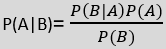

**Working of Naïve Bayes' Classifier:**                           
Working of Naïve Bayes' Classifier can be understood with the help of the below example:

Suppose we have a dataset of weather conditions and corresponding target variable "Play". So using this dataset we need to decide that whether we should play or not on a particular day according to the weather conditions. So to solve this problem, we need to follow the below steps:

Convert the given dataset into frequency tables.
Generate Likelihood table by finding the probabilities of given features.
Now, use Bayes theorem to calculate the posterior probability.

#### Types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:

**Gaussian:** The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.
**Multinomial:** The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
The classifier uses the frequency of words for the predictors.               
**Bernoulli:** The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

#### Python Implementation of the Naïve Bayes algorithm:

**Steps to implement:**
- Data Pre-processing step
- Fitting Naive Bayes to the Training set
- Predicting the test result
- Test accuracy of the result(Creation of Confusion matrix)
- Visualizing the test set result.

<center><h1> Naive Bayes Email Spam Filter </h1></center>

## Dataset Information

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

Link for dataset: https://drive.google.com/file/d/1pceNxK2nMKn5dxLbNZci6PnNVJ23OVAt/view?usp=drive_link

## Attributes

- SMS Messages
- Label (spam/ham)

In [1]:
import pandas as pd

In [3]:
#df = pd.read_csv("spam1.csv")

df= pd.read_csv('spam1.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# get necessary columns for processing
df = df[['v2', 'v1']]
# df.rename(columns={'v2': 'messages', 'v1': 'label'}, inplace=True)
df = df.rename(columns={'v2': 'messages', 'v1': 'label'})
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


## Preprocessing the dataset


In [5]:
# check for null values
df.isnull().sum()

messages    0
label       0
dtype: int64

In [7]:
import nltk
import re
from nltk.corpus import stopwords

In [8]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [9]:
# clean the messages
df['clean_text'] = df['messages'].apply(clean_text)
df.head()

,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though


In [11]:
df.groupby('label').describe()

messages                                                                 \
         count unique                                                top freq   
label                                                                           
ham       4825   4516                             Sorry, I'll call later   30   
spam       747    653  Please call our customer service representativ...    4   

      clean_text                                                            \
           count unique                                                top   
label                                                                        
ham         4825   4479                                   sorry call later   
spam         747    628  camera awarded sipix digital camera call 09061...   

            
      freq  
label       
ham     30  
spam     4

In [12]:
df['spam']=df['label'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,messages,label,clean_text,spam
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...,0
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though,0


## Split the dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.clean_text,df.spam,test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Model Training

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [17]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [18]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9883408071748879

In [19]:
emails = [
    'Hey Aziz, join for the training session',
    'Grab the discount bike loan for 0% intrest. exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)